In [193]:
import geopandas as gp
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import optuna
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import sklearn
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score


In [194]:
filename = '../../POWER_Point_Monthly_Timeseries_1981_2020_046d2199N_119d0837W_LST.json'

In [195]:
df = gp.read_file(filename)
df.head()

,parameter,geometry
0,"{'ALLSKY_KT': {'198401': 0.48, '198402': 0.46,...",POINT Z (-119.08370 46.21990 311.81000)


In [196]:
df['parameter'][0]

{'ALLSKY_KT': {'198401': 0.48,
  '198402': 0.46,
  '198403': 0.53,
  '198404': 0.55,
  '198405': 0.55,
  '198406': 0.58,
  '198407': 0.65,
  '198408': 0.62,
  '198409': 0.58,
  '198410': 0.53,
  '198411': 0.43,
  '198412': 0.47,
  '198413': 0.56,
  '198501': 0.59,
  '198502': 0.52,
  '198503': 0.62,
  '198504': 0.62,
  '198505': 0.65,
  '198506': 0.64,
  '198507': 0.65,
  '198508': 0.62,
  '198509': 0.55,
  '198510': 0.5,
  '198511': 0.45,
  '198512': 0.55,
  '198513': 0.6,
  '198601': 0.47,
  '198602': 0.48,
  '198603': 0.55,
  '198604': 0.6,
  '198605': 0.59,
  '198606': 0.64,
  '198607': 0.6,
  '198608': 0.65,
  '198609': 0.56,
  '198610': 0.61,
  '198611': 0.41,
  '198612': 0.44,
  '198613': 0.58,
  '198701': 0.5,
  '198702': 0.55,
  '198703': 0.59,
  '198704': 0.62,
  '198705': 0.61,
  '198706': 0.63,
  '198707': 0.59,
  '198708': 0.65,
  '198709': 0.66,
  '198710': 0.61,
  '198711': 0.48,
  '198712': 0.48,
  '198713': 0.6,
  '198801': 0.48,
  '198802': 0.6,
  '198803': 0.56,
  '1

In [197]:
type(df['parameter'][0])

dict

In [198]:
Idict = df['parameter'][0]

In [199]:
Idf =  pd.DataFrame.from_dict(Idict)
Idf

,ALLSKY_KT,CLOUD_AMT,CLRSKY_KT,TOA_SW_DWN,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SRF_ALB,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_PAR_TOT,ALLSKY_SFC_SW_DIFF,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UV_INDEX
198401,0.48,67.89,0.70,3.13,-999.00,-999.00,0.29,-999.00,1.49,2.18,-999.00,-999.00,-999.00,-999
198402,0.46,70.16,0.72,4.68,-999.00,-999.00,0.24,-999.00,2.16,3.35,-999.00,-999.00,-999.00,-999
198403,0.53,66.52,0.74,6.90,-999.00,-999.00,0.21,-999.00,3.68,5.14,-999.00,-999.00,-999.00,-999
198404,0.55,67.84,0.76,9.15,-999.00,-999.00,0.15,-999.00,5.07,6.92,-999.00,-999.00,-999.00,-999
198405,0.55,69.68,0.74,10.82,-999.00,-999.00,0.19,-999.00,6.04,8.00,-999.00,-999.00,-999.00,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202009,0.57,42.00,0.63,7.58,9.58,0.20,0.17,5.65,4.32,4.81,78.59,1.37,87.06,-999
202010,0.59,51.23,0.70,5.32,6.95,0.12,0.18,4.88,3.13,3.68,56.94,1.10,67.59,-999
202011,0.48,61.96,0.68,3.50,3.64,0.04,0.17,2.96,1.67,2.38,29.96,0.76,42.98,-999
202012,0.38,68.55,0.66,2.71,2.26,0.02,0.17,2.02,1.02,1.80,18.22,0.51,31.94,-999


In [200]:
Prophetdf = pd.DataFrame(Idf['ALLSKY_KT'])
type(Prophetdf)
Prophetdf

,ALLSKY_KT
198401,0.48
198402,0.46
198403,0.53
198404,0.55
198405,0.55
...,...
202009,0.57
202010,0.59
202011,0.48
202012,0.38


In [201]:
Prophetdf['ALLSKY_KT'][0]

0.48

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


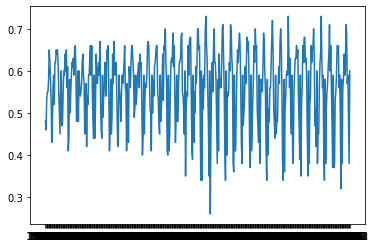

In [202]:
plt.plot(Prophetdf['ALLSKY_KT'][:])

In [203]:
Prophetdf.index[12::13]

Index(['198413', '198513', '198613', '198713', '198813', '198913', '199013',
       '199113', '199213', '199313', '199413', '199513', '199613', '199713',
       '199813', '199913', '200013', '200113', '200213', '200313', '200413',
       '200513', '200613', '200713', '200813', '200913', '201013', '201113',
       '201213', '201313', '201413', '201513', '201613', '201713', '201813',
       '201913', '202013'],
      dtype='object')

In [204]:
Prophetdf=Prophetdf.rename(columns={"ALLSKY_KT": "y"})


def append(dfseries):
    dfseries = dfseries[:4] + '/' + dfseries[4:]
    return dfseries
print(Prophetdf.index[12::13])
print(Prophetdf.shape)
Prophetdf = Prophetdf.drop(Prophetdf.index[12::13])
print(Prophetdf.shape)
Prophetdf['ds']=Prophetdf.index
Prophetdf['ds']= Prophetdf['ds'].astype(str)

Prophetdf['ds'] = Prophetdf['ds'].apply(append)
#a_string = a_string[:1] + "b" + a_string[1:]
Prophetdf

Index(['198413', '198513', '198613', '198713', '198813', '198913', '199013',
       '199113', '199213', '199313', '199413', '199513', '199613', '199713',
       '199813', '199913', '200013', '200113', '200213', '200313', '200413',
       '200513', '200613', '200713', '200813', '200913', '201013', '201113',
       '201213', '201313', '201413', '201513', '201613', '201713', '201813',
       '201913', '202013'],
      dtype='object')
(481, 1)
(444, 1)


,y,ds
198401,0.48,1984/01
198402,0.46,1984/02
198403,0.53,1984/03
198404,0.55,1984/04
198405,0.55,1984/05
...,...,...
202008,0.69,2020/08
202009,0.57,2020/09
202010,0.59,2020/10
202011,0.48,2020/11


In [205]:
Prophetdf['ds'][26]

'1986/03'

In [206]:
m = Prophet(weekly_seasonality=False,daily_seasonality=True)
m.fit(Prophetdf)

Initial log joint probability = -12.4192


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1032.84    0.00106165       77.3286      0.7306      0.7306      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175       1033.52   1.04702e-06       101.762   1.478e-08       0.001      260  LS failed, Hessian reset 
     184       1033.52   2.41266e-08       63.3848      0.2457           1      274   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [207]:
futuredays=365*20
future = m.make_future_dataframe(periods=futuredays)
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7739,2040-11-22,0.383724,0.332453,0.439140
7740,2040-11-23,0.381527,0.327541,0.438476
7741,2040-11-24,0.380401,0.330041,0.432970
7742,2040-11-25,0.380323,0.322461,0.434033
7743,2040-11-26,0.381238,0.323523,0.435753


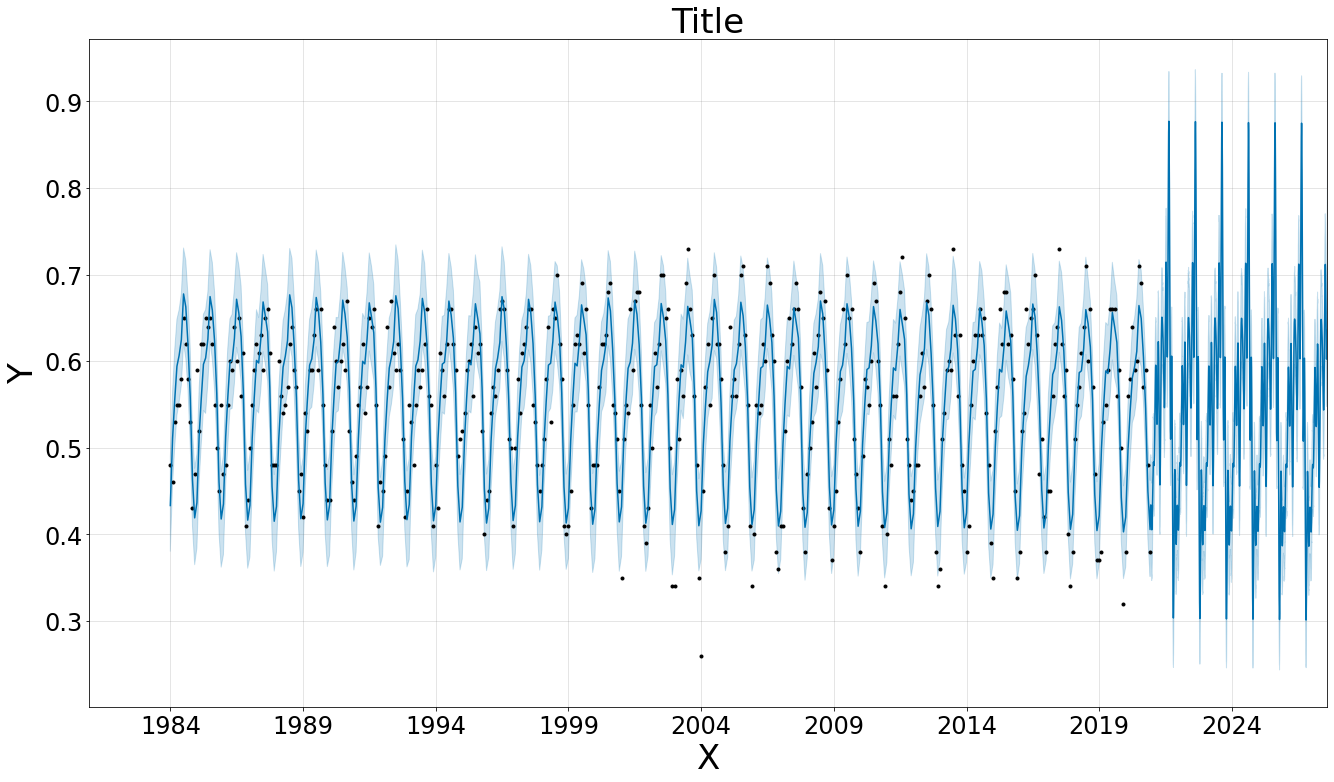

In [208]:

fig1 = m.plot(forecast,figsize=(18,10 ))
#figsize=(18,10)
ax = fig1.gca()
ax.set_title("Title", size=34)
ax.set_xlabel("X", size=34)
ax.set_ylabel("Y", size=34)
x2=16801
x1=4000

x3=21030
x4=26000
ax.set_xlim([x1,x3])
ax.tick_params(axis="x", labelsize=24)
ax.tick_params(axis="y", labelsize=24)

In [209]:
#model = ARIMA(Prophetdf['y'],exog =Prophetdf['ds'], order=(5,1,0))
model = ARIMA(Prophetdf['y'].values, order=(6,1,3),seasonal_order=(1,0,1,12),enforce_stationarity= False )

model_fit = model.fit()


/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [210]:
#print(model_fit.summary())

In [211]:
model_fit.aic

-1436.8338656156247

In [212]:
pred_sol = model_fit.predict(start = 1, end = 600)

In [148]:
datay=Prophetdf['y'].values
datay=list(datay)
test = 100
for t in range(test):
    model2 = ARIMA(datay, order=(6,0,3),seasonal_order=(1,0,1,12),enforce_invertibility=False)
    model_fit2 = model2.fit()
    output = model_fit2.forecast()
    yhat = output[0]
    datay.append(yhat)

/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_

/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_

/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_

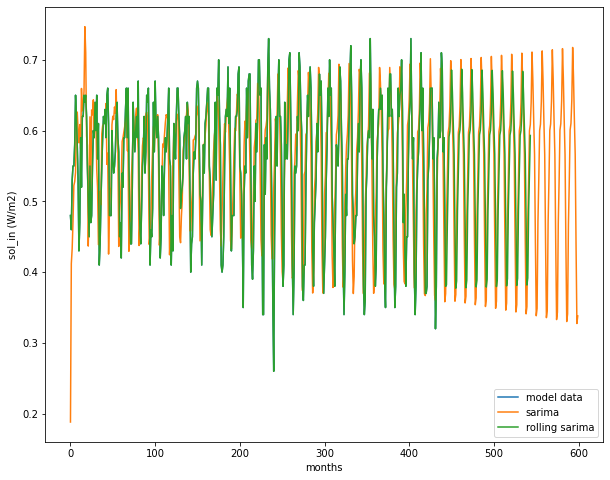

In [153]:
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(Prophetdf['y'].values,label = 'model data')
ax.plot(pred_sol, label = 'sarima')
ax.plot(datay,label = 'rolling sarima')
ax.set_xlabel('months')
ax.set_ylabel('sol_in (W/m2)')
#ax.set_xlim([400,500])
ax.legend()

/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


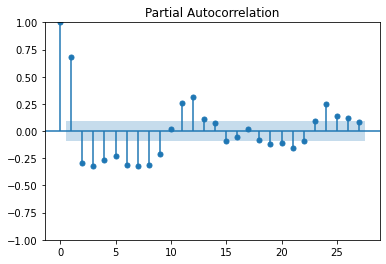

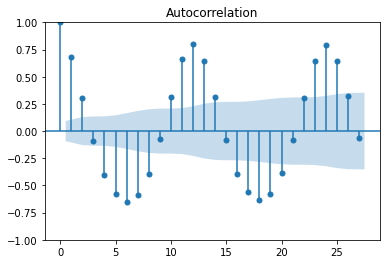

In [213]:
plot_pacf(Prophetdf['y']);
plot_acf(Prophetdf['y']);

In [214]:
ad_fuller_result = adfuller(Prophetdf['y'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -5.416560044974137
p-value: 3.1262289348109963e-06


In [220]:
print(len(Prophetdf['ds'].values))
Prophetdf['ds'].values

444


array(['1984/01', '1984/02', '1984/03', '1984/04', '1984/05', '1984/06',
       '1984/07', '1984/08', '1984/09', '1984/10', '1984/11', '1984/12',
       '1985/01', '1985/02', '1985/03', '1985/04', '1985/05', '1985/06',
       '1985/07', '1985/08', '1985/09', '1985/10', '1985/11', '1985/12',
       '1986/01', '1986/02', '1986/03', '1986/04', '1986/05', '1986/06',
       '1986/07', '1986/08', '1986/09', '1986/10', '1986/11', '1986/12',
       '1987/01', '1987/02', '1987/03', '1987/04', '1987/05', '1987/06',
       '1987/07', '1987/08', '1987/09', '1987/10', '1987/11', '1987/12',
       '1988/01', '1988/02', '1988/03', '1988/04', '1988/05', '1988/06',
       '1988/07', '1988/08', '1988/09', '1988/10', '1988/11', '1988/12',
       '1989/01', '1989/02', '1989/03', '1989/04', '1989/05', '1989/06',
       '1989/07', '1989/08', '1989/09', '1989/10', '1989/11', '1989/12',
       '1990/01', '1990/02', '1990/03', '1990/04', '1990/05', '1990/06',
       '1990/07', '1990/08', '1990/09', '1990/10', 

In [223]:
X=Prophetdf['ds'].values
y=Prophetdf['y'].values

#tss = TimeSeriesSplit()

tss = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=11)
print(tss)
kmax = len(Prophetdf['y'].values/12)-1
k=0
for train_index, test_index in tss.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    if k == kmax-1:
        X_val, X_val = X[train_index], X[test_index]
        y_val, y_val = y[train_index], y[test_index]
    k=k+1

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=11, test_size=None)
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36] TEST: [37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73] TEST: [ 74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70

In [217]:
y_train[0]

0.48

In [ ]:
#SARIMAX.fit()
#Prophetdf['y'].values, order=(6,0,3),seasonal_order=(1,0,1,12),
#                 enforce_stationarity=False,enforce_invertibility =False

In [ ]:
models = SARIMAX(Prophetdf['y'].values, order=(6,0,3),seasonal_order=(1,0,1,12),
                 enforce_stationarity=False,enforce_invertibility =False);
model_fits = models.fit()
outputs = model_fits.predict(start = 1, end = 600)
outputs2 = model_fits.get_forecast(steps=100)

In [33]:



def analytical_score_IC(data,p,d,q,P,D,Q):
    model = ARIMA(data, order=(p,d,q),seasonal_order=(P,D,Q,12),enforce_stationarity= False )
    model_fit = model.fit()
    AIC = model_fit.aic
    BIC = model_fit.bic
    score = (AIC + BIC)/2
    return score


def analytical_score_TSS(data,p,d,q,P,D,Q):
    model = SARIMAX(data, order=(p,d,q),seasonal_order=(P,D,Q,12),
                 enforce_stationarity=False,enforce_invertibility =False)
    model_fits = models.fit()
#    y_pred = model_fits.predict(start = 1, end = 600)
    y_pred = model_fits.get_forecast(steps=100)
    score = r2_score(y_val, y_pred)
    return score


def train_evaluate_hyperparameters(max_depth, min_weight_fraction_leaf):
    # create a model
    regressor = sklearn.tree.DecisionTreeClassifier(random_state=0,max_depth=max_depth,min_weight_fraction_leaf=min_weight_fraction_leaf)

    # train the model on the training set
    reg = regressor.fit(X_train,y_train)
    # evaluate the model on the validation set
    y_pred = reg.predict(X_val)
    score = r2_score(y_val, y_pred)
    return score

In [36]:
def objective(trial):
    # define hyperparameter space
    p = trial.suggest_int("p", 0, 10)
    d = trial.suggest_int("d", 0, 3)
    q = trial.suggest_int("q", 0, 6)
    P = trial.suggest_int("P", 0, 3)
    D = trial.suggest_int("D", 0, 2)
    Q = trial.suggest_int("Q", 0, 3)
    
    # get the score for the hyperparameters chosen
    score = analytical_score_IC(Prophetdf['y'].values,p,d,q,P,D,Q)
    
    return score

In [37]:
# Create a study with the tep sampler
study = optuna.create_study(sampler=optuna.samplers.TPESampler(), direction='minimize')
# run the study.
# this uses TPE to try different hyperparameters (in this case x and y)
# and searches for the best ones
study.optimize(objective, n_trials=100)
# get the results as dataframe
results = study.trials_dataframe()

[I 2022-03-06 12:19:29,289] A new study created in memory with name: no-name-75788bdb-54d5-4252-bcb6-b457b32e1af0
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
[I 2022-03-06 12:19:31,918] Trial 0 finished with value: -1402.755972216834 and parameters: {'p': 1, 'd': 1, 'q': 4, 'P': 0, 'D': 1, 'Q': 1}. Best is trial 0 with value: -1402.755972216834.
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
[I 2022-03-06 12:22:25,

/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
[I 2022-03-06 12:29:41,939] Trial 13 finished with value: -1238.10782879631 and parameters: {'p': 1, 'd': 0, 'q': 4, 'P': 1, 'D': 2, 'Q': 1}. Best is trial 0 with value: -1402.755972216834.
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
[I 2022-03-06 12:29:42,521] Trial 14 finished with value: -1334.245614065632 and parameters: {'p': 8, 'd': 1, 'q': 5, 'P': 0, 'D': 0, 'Q': 0}. B

[I 2022-03-06 12:30:46,027] Trial 26 finished with value: -1355.8143214037923 and parameters: {'p': 5, 'd': 0, 'q': 2, 'P': 2, 'D': 0, 'Q': 3}. Best is trial 24 with value: -1426.028907421678.
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
[I 2022-03-06 12:30:53,366] Trial 27 finished with value: -1348.5677726848842 and parameters: {'p': 7, 'd': 1, 'q': 3, 'P': 1, 'D': 1, 'Q': 2}. Best is trial 24 with value: -1426.028907421678.
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA paramete

/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
[I 2022-03-06 12:34:58,141] Trial 38 finished with value: -1259.0136836021247 and parameters: {'p': 3, 'd': 1, 'q': 5, 'P': 5, 'D': 0, 'Q': 1}. Best is trial 24 with value: -1426.028907421678.
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606:

/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
[I 2022-03-06 12:37:48,153] Trial 51 finished with value: -1286.9305920734323 and parameters: {'p': 8, 'd': 1, 'q': 4, 'P': 0, 'D': 0, 'Q': 0}. Best is trial 24 with value: -1426.028907421678.
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
[I 2022-03-06 12:37:51,891] Trial 52 finished with value: -1351.1875252827033 and parameters: {'p': 8, 'd': 0, 'q': 4, 'P': 0, 'D': 0, 'Q': 1

/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
[I 2022-03-06 12:39:33,981] Trial 65 finished with value: -452.0566721267847 and parameters: {'p': 8, 'd': 0, 'q': 5, 'P': 0, 'D': 3, 'Q': 0}. Best is trial 24 with value: -1426.028907421678.
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: 

/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
[I 2022-03-06 12:40:40,589] Trial 79 finished with value: -1204.60938298607 and parameters: {'p': 6, 'd': 2, 'q': 3, 'P': 3, 'D': 1, 'Q': 1}. Best is trial 24 with value: -1426.028907421678.
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: C

/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
[I 2022-03-06 12:41:36,148] Trial 91 finished with value: -1409.8606753923436 and parameters: {'p': 6, 'd': 1, 'q': 5, 'P': 1, 'D': 0, 'Q': 1}. Best is trial 24 with value: -1426.028907421678.
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
[I 2022-03-06 12:41:39,741] Trial 92 finished with value: -1409.8606753923436 and parameters: {'p': 6, 'd': 1, 'q': 5, 'P': 1, 'D': 0, 'Q': 1

In [38]:
results

,number,value,datetime_start,datetime_complete,duration,params_D,params_P,params_Q,params_d,params_p,params_q,state
0,0,-1402.755972,2022-03-06 12:19:29.290295,2022-03-06 12:19:31.918698,0 days 00:00:02.628403,1,0,1,1,1,4,COMPLETE
1,1,-476.631665,2022-03-06 12:19:31.919907,2022-03-06 12:22:25.282850,0 days 00:02:53.362943,5,6,3,0,6,1,COMPLETE
2,2,286.460889,2022-03-06 12:22:25.284088,2022-03-06 12:25:37.396905,0 days 00:03:12.112817,4,8,2,5,5,1,COMPLETE
3,3,-326.968678,2022-03-06 12:25:37.398384,2022-03-06 12:26:41.548756,0 days 00:01:04.150372,5,4,3,2,0,5,COMPLETE
4,4,-1284.811654,2022-03-06 12:26:41.550608,2022-03-06 12:27:01.233442,0 days 00:00:19.682834,1,3,2,1,6,5,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,-1384.564391,2022-03-06 12:41:48.762548,2022-03-06 12:41:51.860948,0 days 00:00:03.098400,0,1,1,2,5,5,COMPLETE
96,96,-1409.860675,2022-03-06 12:41:51.862104,2022-03-06 12:41:55.438516,0 days 00:00:03.576412,0,1,1,1,6,5,COMPLETE
97,97,-1368.609130,2022-03-06 12:41:55.439876,2022-03-06 12:42:00.746783,0 days 00:00:05.306907,0,2,1,1,6,5,COMPLETE
98,98,-1409.860675,2022-03-06 12:42:00.747744,2022-03-06 12:42:04.144730,0 days 00:00:03.396986,0,1,1,1,6,5,COMPLETE


In [40]:
results['value'].min()

-1426.028907421678

In [41]:
results['value'].idxmin()

24

In [42]:
results.iloc[24,:]

number                                       24
value                              -1426.028907
datetime_start       2022-03-06 12:30:31.369725
datetime_complete    2022-03-06 12:30:34.660535
duration                 0 days 00:00:03.290810
params_D                                      0
params_P                                      1
params_Q                                      1
params_d                                      0
params_p                                      6
params_q                                      3
state                                  COMPLETE
Name: 24, dtype: object

In [73]:
results.to_csv('../../hyperparameter_results.csv') 

In [154]:
models = SARIMAX(Prophetdf['y'].values, order=(6,0,3),seasonal_order=(1,0,1,12),
                 enforce_stationarity=False,enforce_invertibility =False);
model_fits = models.fit()
outputs = model_fits.predict(start = 1, end = 600)
outputs2 = model_fits.get_forecast(steps=150)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.32188D-01    |proj g|=  2.77253D+00


 This problem is unconstrained.



At iterate    5    f= -5.54173D-01    |proj g|=  2.19036D+00

At iterate   10    f= -8.73617D-01    |proj g|=  5.85302D+00

At iterate   15    f= -1.12615D+00    |proj g|=  9.87172D-01

At iterate   20    f= -1.14734D+00    |proj g|=  3.81303D+00

At iterate   25    f= -1.21879D+00    |proj g|=  2.72768D+00

At iterate   30    f= -1.40448D+00    |proj g|=  9.24492D+00

At iterate   35    f= -1.48303D+00    |proj g|=  6.24859D+00

At iterate   40    f= -1.50742D+00    |proj g|=  4.17205D-01

At iterate   45    f= -1.54211D+00    |proj g|=  6.07754D+00

At iterate   50    f= -1.55295D+00    |proj g|=  4.20989D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [156]:
outputs2.predicted_mean

array([0.39252124, 0.48898806, 0.52844237, 0.58775693, 0.60512821,
       0.63571933, 0.68791934, 0.646571  , 0.59595541, 0.57151037,
       0.47004275, 0.36640823, 0.37730788, 0.4836447 , 0.53706426,
       0.59535286, 0.60018538, 0.62725168, 0.68787237, 0.65276543,
       0.59907213, 0.56803754, 0.46496328, 0.36613167, 0.38129602,
       0.48551414, 0.53408484, 0.59170542, 0.60016214, 0.62950551,
       0.68835585, 0.65046289, 0.59666835, 0.56797375, 0.46639004,
       0.36640544, 0.37971381, 0.48393402, 0.53404741, 0.59236485,
       0.59989561, 0.62809856, 0.68706426, 0.65023447, 0.59689911,
       0.56757844, 0.46539297, 0.3656805 , 0.37965365, 0.4839853 ,
       0.53359659, 0.59144768, 0.59913428, 0.62774737, 0.68675602,
       0.64964343, 0.59610777, 0.56694694, 0.46513104, 0.36554282,
       0.37928869, 0.48338348, 0.53305432, 0.59103026, 0.59871673,
       0.62715987, 0.68603368, 0.64903168, 0.59565399, 0.56651256,
       0.46469099, 0.36514561, 0.37893572, 0.48300636, 0.53262

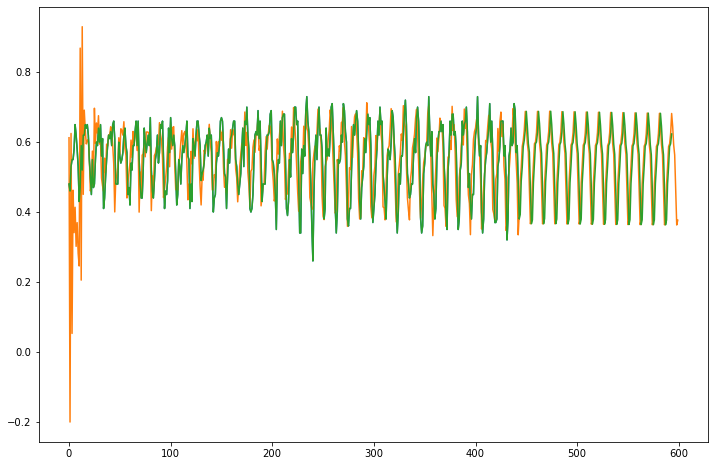

In [169]:
fig, ax = plt.subplots(figsize=(12,8))
outputs22 = np.concatenate((Prophetdf['y'].values,outputs2.predicted_mean))
ax.plot(Prophetdf['y'].values)
ax.plot(outputs)
ax.plot(outputs22)

In [165]:
np.concatenate(Prophetdf['y'].values,outputs2.predicted_mean)

TypeError: only integer scalar arrays can be converted to a scalar index

In [167]:
outputs2.predicted_mean[0]

0.39252123641985937

In [168]:
Prophetdf['y'].values[0]

0.48

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73] TEST: [ 74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  